In [3]:
# import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import shutil
# shutil.rmtree('./added_flowers_img')
# print(os.path.exists("./added_flowers_img"))

# 데이터 로드

- 후보 바뀌기 전 데이터라 교체해야되긴하는데 일단 코드 잘 동작하나 확인용으로 가져왔습니다.
- 6.14 작업 내용 
  - 데이터 후보 30개 정해진걸로 교체
  - 압축 해제하면 파일 이름 깨지는 경우 확인
  - Unknown image file format. One of JPEG, PNG, GIF, BMP required. 오류 확인 -> webp가 중간에 껴있는 경우가 있는데 그거 때문인거 같음
  - webp 같은 지원하지 않는 파일 직접 찾아서 지움

In [4]:
from zipfile import ZipFile
test_file_name = "./data/added_flowers_img.zip"

# 폴더 이름이 ░ó╜├║╫▓╔ 이런식으로 깨져서 디코딩 옵션 추가

with ZipFile(test_file_name, 'r') as zip:
#     zip.printdir()
#     zip.extractall() 
    zipInfo = zip.infolist()
    for member in zipInfo:
        try:
            print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
            member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
            zip.extract(member)
        except:
            print(member)
            raise Exception('what?!')

added_flowers_img/
added_flowers_img/각시붓꽃/
added_flowers_img/각시붓꽃/각시붓꽃 1.bimgvp0000004997.jpg
added_flowers_img/각시붓꽃/각시붓꽃 10.0q.25796104.1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 100.bimgvp0000002138.jpg
added_flowers_img/각시붓꽃/각시붓꽃 101.3232235521_ndwfkqbl_2912da0a76225c5025ec15531f453db40a920cd9.jpg
added_flowers_img/각시붓꽃/각시붓꽃 102.15445_13167_533.jpg
added_flowers_img/각시붓꽃/각시붓꽃 103.141b2f0d4a05daed08.jpg
added_flowers_img/각시붓꽃/각시붓꽃 104.251fcd3458ec2b5d16.jpg
added_flowers_img/각시붓꽃/각시붓꽃 105.aad4f094241ad0c58081c56c7801467a.jpg
added_flowers_img/각시붓꽃/각시붓꽃 106.1292822_1257207_331.jpg
added_flowers_img/각시붓꽃/각시붓꽃 108.2013010916120_1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 109.835f428588f1099ab2620856149fdaaa.jpg
added_flowers_img/각시붓꽃/각시붓꽃 11.643ea24455180c2ebd7fce4decb3817e.jpg
added_flowers_img/각시붓꽃/각시붓꽃 110..jpg
added_flowers_img/각시붓꽃/각시붓꽃 111.pimg_7674141363417992.jpg
added_flowers_img/각시붓꽃/각시붓꽃 112.080420__ea_b0_81_ec_8b_9c_eb_b6_93_ea_bd_833.jpg
added_flowers_img/각시붓꽃/각시붓꽃 113.97800ad622cdb4b64535061

In [6]:
import pathlib

data_dir = pathlib.Path("./added_flowers_img")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9309


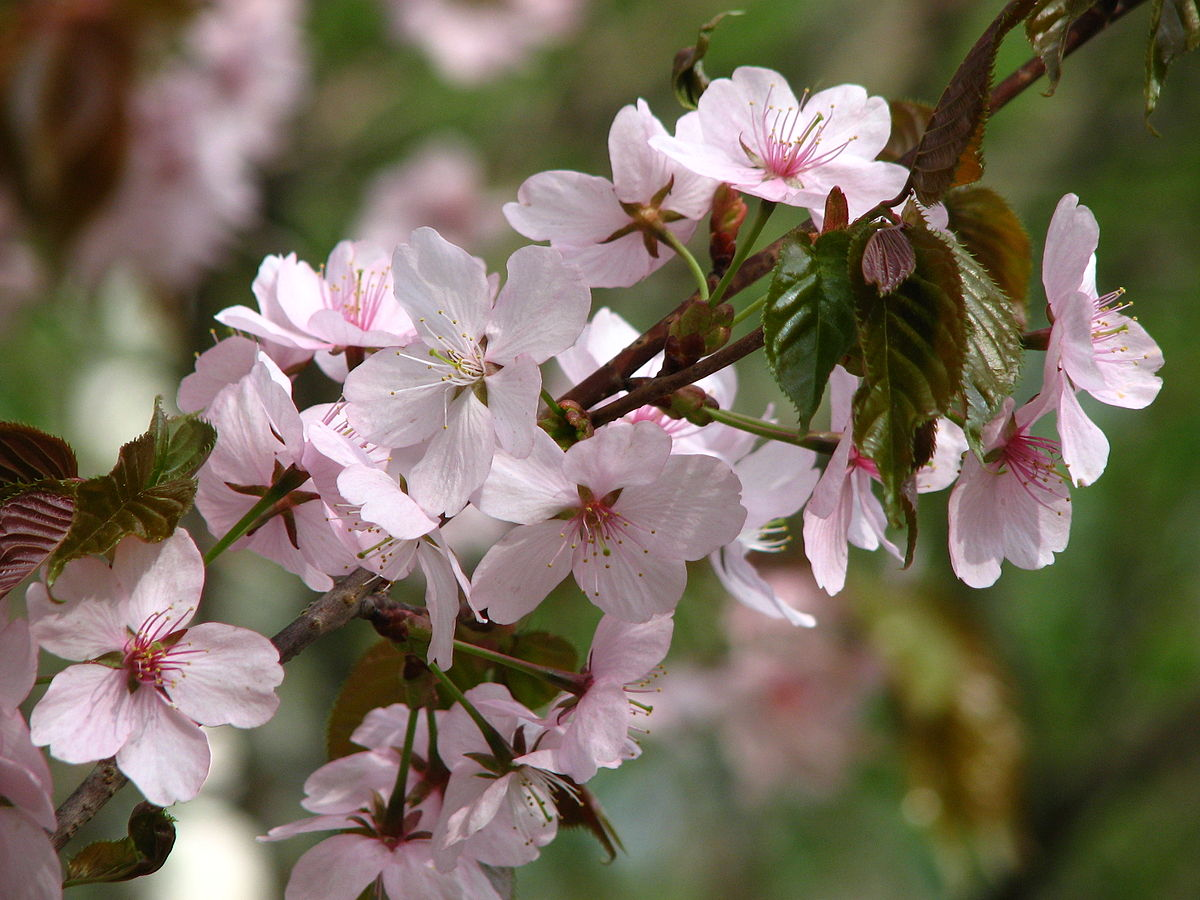

In [7]:
test = list(data_dir.glob('벚나무/*'))
PIL.Image.open(str(test[0]))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9327 files belonging to 30 classes.
Using 7462 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9327 files belonging to 30 classes.
Using 1865 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['각시붓꽃', '국화', '꽃아까시나무', '꽃향유', '노루귀', '노루오줌', '단풍나무', '동백나무', '목련', '무궁화', '물봉선', '밤나무', '버드나무', '벚나무', '봉선화', '산딸나무', '소나무', '수국', '수선화', '은방울꽃', '은행나무', '작약', '진달래', '참나리', '측백나무', '층꽃나무', '토끼풀', '패랭이꽃', '할미꽃', '해바라기']


### 한글이 깨져서 안나와서 vm에디가 글꼴 설치

In [10]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


In [11]:
!ls -l /usr/share/fonts/truetype/

total 4
drwxr-xr-x 2 root root 4096 Jun 14 14:21 nanum


In [12]:
!rm -rf ~/.cache/matplotlib/*

In [2]:
import matplotlib    
import matplotlib.font_manager

print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# fm._rebuild()
# fm.get_fontconfig_fonts()

# # 디렉토리 및 파일 이름에 맞추어 변경
# font_location = './Malgun-Gothic_29381.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()
# rc('font', family=font_name)

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

Cannot decode configuration file /usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data/matplotlibrc with encoding UTF-8, check LANG and LC_* variables.


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa2 in position 17: invalid start byte

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

InvalidArgumentError: Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext]